# Aerosol size distribution observations

In [1]:
from imports import (
        pd, np, xr, mpl, plt, sns, os,
        glob, datetime, sys, crt, LogNorm
    )

#from datetime import datetime
#import matplotlib.dates as mdates
%matplotlib inline

# Zeppelin Station 2010 hourly data

In [2]:
filename = "~/shared-ns1000k/inputs/Aerosol_sizedist_obs/Zeppelin_2010_hourly.csv"
mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")

data = pd.read_csv(filename,  parse_dates=[['0', '0.1', '0.2', '0.3', '0.4']], date_parser = mydateparser)

In [3]:
data.rename(columns={'0_0.1_0.2_0.3_0.4':'date'}, inplace = True)
data.head()

,date,0.5,20,22.44,25.179,28.251,31.698,35.566,39.905,44.774,...,200,224.4,251.79,282.51,316.98,355.66,399.05,447.74,502.38,0.6
0,2010-01-01 00:00:00,127.010,9.2141,13.324,18.261,23.245,30.351,39.469,47.835,47.834,...,115.400,168.74,298.22,358.39,247.52,125.57,54.136,22.321,9.6607,0
1,2010-01-01 01:00:00,110.150,7.4015,12.835,18.326,23.133,26.412,31.988,38.002,38.111,...,101.910,140.92,244.34,294.45,218.56,115.03,49.696,20.944,9.4524,0
2,2010-01-01 02:00:00,98.864,8.2293,10.186,14.526,19.346,23.288,30.828,32.256,33.385,...,88.761,121.91,207.21,267.87,196.08,101.87,45.479,20.855,9.9242,0
3,2010-01-01 03:00:00,103.960,6.0217,10.014,14.795,21.470,26.444,28.621,31.333,31.407,...,93.949,133.17,231.84,290.35,209.66,110.80,50.558,23.200,11.1620,0
4,2010-01-01 04:00:00,109.060,9.8351,12.526,15.748,19.991,24.453,30.328,33.429,36.533,...,106.060,142.54,243.29,307.78,215.96,115.79,54.965,24.622,12.0210,0


In [4]:
data = data.set_index('date')

In [5]:
data.replace(to_replace=-999, value = np.nan, inplace=True)

In [6]:
# Remove last column
data.drop(labels='0.6', axis=1, inplace=True)

In [7]:
# Transpose data, remove missing values and invert Y axis (to get increasing values)
s = data.T.iloc[::-1].dropna(axis=1)

In [8]:
s.head()

date,2010-01-01 00:00:00,2010-01-01 01:00:00,2010-01-01 02:00:00,2010-01-01 03:00:00,2010-01-01 04:00:00,2010-01-01 05:00:00,2010-01-01 06:00:00,2010-01-01 07:00:00,2010-01-01 08:00:00,2010-01-01 09:00:00,...,2010-11-11 15:00:00,2010-11-11 16:00:00,2010-11-11 17:00:00,2010-11-11 18:00:00,2010-11-11 19:00:00,2010-11-11 20:00:00,2010-11-11 21:00:00,2010-11-11 22:00:00,2010-11-11 23:00:00,2010-12-31 23:00:00
502.38,9.6607,9.4524,9.9242,11.162,12.021,9.3495,12.388,12.919,14.007,18.316,...,0.52357,0.58579,0.56616,0.65425,0.68104,0.6944,0.68916,0.69631,0.91661,10.942
447.74,22.3210,20.9440,20.8550,23.200,24.622,22.9040,25.120,29.511,31.854,45.473,...,1.16750,1.19520,1.17160,1.25830,1.32100,1.3670,1.39310,1.35720,1.37450,24.243
399.05,54.1360,49.6960,45.4790,50.558,54.965,52.1210,52.426,67.742,72.495,109.400,...,2.41200,2.43870,2.43170,2.47260,2.55230,2.7754,2.65180,2.56280,2.34410,54.696
355.66,125.5700,115.0300,101.8700,110.800,115.790,113.4400,108.550,142.830,148.160,210.980,...,4.60300,4.72110,4.73730,4.48980,4.84750,5.1592,4.82660,4.62230,4.10160,134.400
316.98,247.5200,218.5600,196.0800,209.660,215.960,215.5900,200.790,257.340,242.750,296.610,...,7.59920,8.00990,7.83710,7.21800,7.99940,8.3029,7.96630,7.88700,6.86390,278.080


Text(0.5,6,'Date (month HH:SS)')

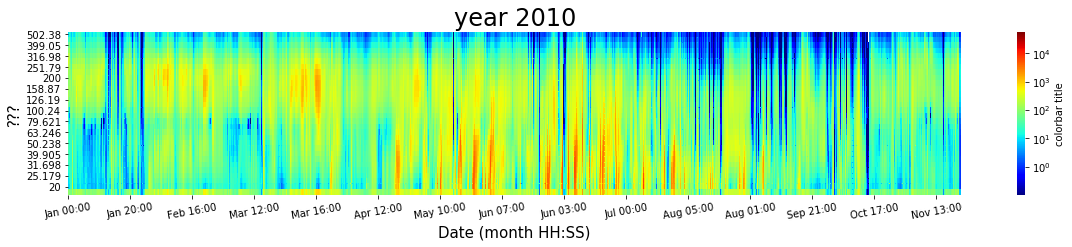

In [10]:
fig = plt.figure(1, figsize=[20,3])

LOGMIN = 0.1  # a priori chosen appropriate for log-scaled data display
ax = plt.subplot(1, 1, 1)
cax = sns.heatmap(s,cmap='jet',  ax=ax, xticklabels=500, norm=LogNorm(), 
                  vmin = max(s.values.min(), LOGMIN), vmax = s.values.max(),
                  cbar_kws={"ticks":[0,1,10,1e2,1e3,1e4,1e5], 'label': 'colorbar title'})

labels = [datetime.strptime(item.get_text(), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%b %H:%M") for item in cax.get_xticklabels()] 
cax.set_xticklabels(labels, rotation=10)
cax.set_title('year ' + str(data.index.year.unique().values[0]), fontsize=24)
cax.set_ylabel('???', fontsize = 15)
cax.set_xlabel('Date (month HH:SS)', fontsize = 15)

Text(0.5,6,'Date (month HH:SS)')

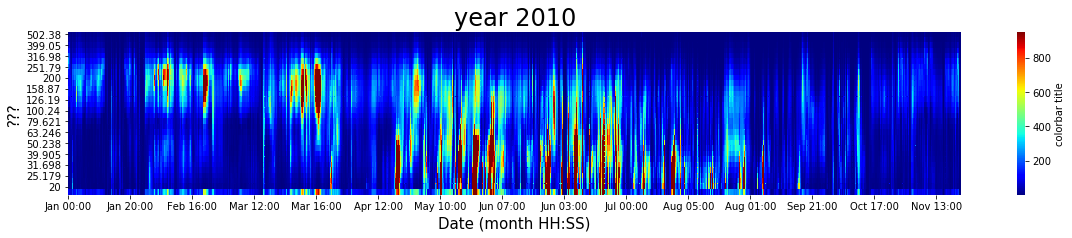

In [11]:
fig = plt.figure(1, figsize=[20,3])

ax = plt.subplot(1, 1, 1)
# robust: If True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.
cax = sns.heatmap(s,cmap='jet', ax=ax, xticklabels=500, 
                  cbar_kws={'label': 'colorbar title'}, robust=True)

labels = [datetime.strptime(item.get_text(), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%b %H:%M") for item in cax.get_xticklabels()] 
cax.set_xticklabels(labels, rotation=0)
cax.set_title('year ' + str(data.index.year.unique().values[0]), fontsize=24)
cax.set_ylabel('???', fontsize = 15)
cax.set_xlabel('Date (month HH:SS)', fontsize = 15)

## Separate aero_dist files by observatory ##

In [47]:
aerofile = os.listdir()
#print(aerofile)
#os.chdir('~/')
sites = ['Zeppelin', 'ALERT', 'Barrow', 'Tiksi', 'Nord']
sitefiles = {}
for site in sites:
    temp_site_files = [x for x in aerofile if site in x]
    sitefiles[site] = temp_site_files

print(sitefiles)
sitefiles.keys()
#print(filepaths0)

{'Zeppelin': ['Zeppelin_2011_hourly.csv', 'Zeppelin_2015_hourly.csv', 'Zeppelin_2013_hourly.csv', 'Zeppelin_2012_hourly.csv', 'Zeppelin_2010_hourly.csv'], 'ALERT': ['ALERT_2013_hourly.csv', 'ALERT_2012_hourly.csv', 'ALERT_2011_hourly.csv'], 'Barrow': ['Barrow_2007_hourly.csv', 'Barrow_2008_hourly.csv', 'Barrow_2013_hourly.csv', 'Barrow_2009_hourly.csv', 'Barrow_2015_hourly.csv', 'Barrow_2014_hourly.csv'], 'Tiksi': ['Tiksi_2013_hourly.csv', 'Tiksi_2014_hourly.csv', 'Tiksi_2015_hourly.csv'], 'Nord': ['Station_Nord_2012_hourly.csv', 'Station_Nord_2013_hourly.csv', 'Station_Nord_2011_hourly.csv', 'Station_Nord_2010_hourly.csv']}


dict_keys(['Zeppelin', 'ALERT', 'Barrow', 'Tiksi', 'Nord'])

Average each station's data into monthly values. Develop some kind of test if there is enough data.